In [211]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [212]:
input = pd.read_excel("Data/input.xlsx")
input

,URL_ID,URL
0,37.0,https://insights.blackcoffer.com/ai-in-healthc...
1,38.0,https://insights.blackcoffer.com/what-if-the-c...
2,39.0,https://insights.blackcoffer.com/what-jobs-wil...
3,40.0,https://insights.blackcoffer.com/will-machine-...
4,41.0,https://insights.blackcoffer.com/will-ai-repla...
...,...,...
109,146.0,https://insights.blackcoffer.com/blockchain-fo...
110,147.0,https://insights.blackcoffer.com/the-future-of...
111,148.0,https://insights.blackcoffer.com/big-data-anal...
112,149.0,https://insights.blackcoffer.com/business-anal...


'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>How to protect future data and its privacy? | Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Feed" href="https://insights.blackcoffer.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Comments Feed" href="https://insights.blackcoffer.com/comments/feed/" />\n<script type="text/javascript">\nwindow._wpemojiSettings = {"baseUrl":
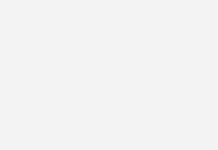
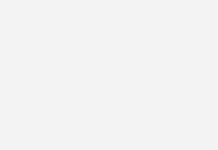
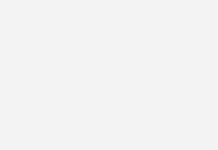
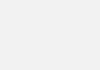
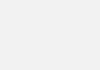
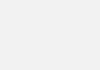
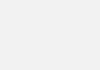
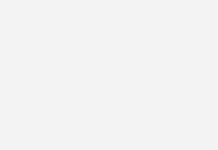
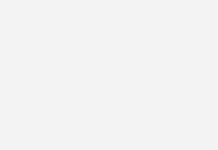
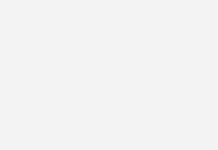
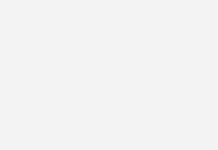

In [213]:
for i in range(10,11): # (113,114)
    page = ''
    page = requests.get(input.iloc[i][1]).text

page

In [214]:
soup = BeautifulSoup(page,'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]--><!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html lang="en-US"> <!--<![endif]-->
<head>
<title>How to protect future data and its privacy? | Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="https://insights.blackcoffer.com/feed/" rel="alternate" title="Blackcoffer Insights » Feed" type="application/rss+xml"/>
<link href="https://insights.blackcoffer.com/comments/feed/" rel="alternate" title="Blackcoffer Insights » Comments Feed" type="application/rss+xml"/>
<script type="text/javascript">
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/72x72\/","ext":".png","svgUrl":"h

In [215]:
# soup.prettify()

In [216]:
title = soup.find('title').text
title

'How to protect future data and its privacy? | Blackcoffer Insights'

In [217]:
div = soup.find_all('div', class_='td-post-content')
div

[<div class="td-post-content tagdiv-type">
 <p>Before the internet, information was in some ways restricted and more centralized. The only mediums of information were books, newspapers, and word of mouth, etc. But now with the advent of the internet and improvements to computer technology (Moore’s Law), information and data skyrocketed, and it has become this open-system, where information can be distributed to people without any kind of limits.</p>
 <h3><strong>SECURING YOUR DEVICES AND NETWORKS</strong></h3>
 <h3><strong>Encrypt your data</strong></h3>
 <p>Various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. Data encryption isn’t just for technology geeks; modern tools make it possible for anyone to encrypt emails and other information. “Encryption used to be the sole province of geeks and mathematicians, but a lot has changed in recent years. In particular, various publicly available tools have taken the rocket science ou

In [218]:
div[0]

<div class="td-post-content tagdiv-type">
<p>Before the internet, information was in some ways restricted and more centralized. The only mediums of information were books, newspapers, and word of mouth, etc. But now with the advent of the internet and improvements to computer technology (Moore’s Law), information and data skyrocketed, and it has become this open-system, where information can be distributed to people without any kind of limits.</p>
<h3><strong>SECURING YOUR DEVICES AND NETWORKS</strong></h3>
<h3><strong>Encrypt your data</strong></h3>
<p>Various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. Data encryption isn’t just for technology geeks; modern tools make it possible for anyone to encrypt emails and other information. “Encryption used to be the sole province of geeks and mathematicians, but a lot has changed in recent years. In particular, various publicly available tools have taken the rocket science out of 

In [219]:
ptags = 0
# if html page has no article than there will be no div containing the article
if len(div) != 0: # index 7 
    ptags = len(div[0].find_all('p'))

ptags

22

In [220]:
art_text = ''
for j in range(ptags):
    art_text = art_text + ' ' + div[0].find_all('p')[j].text
    
art_text

' Before the internet, information was in some ways restricted and more centralized. The only mediums of information were books, newspapers, and word of mouth, etc. But now with the advent of the internet and improvements to computer technology (Moore’s Law), information and data skyrocketed, and it has become this open-system, where information can be distributed to people without any kind of limits. Various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. Data encryption isn’t just for technology geeks; modern tools make it possible for anyone to encrypt emails and other information. “Encryption used to be the sole province of geeks and mathematicians, but a lot has changed in recent years. In particular, various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. GPG for Mail, for example, is an open-source plug-in for the Apple Mail program that makes it easy to encrypt,

In [221]:
title

'How to protect future data and its privacy? | Blackcoffer Insights'

In [222]:
article = title + art_text
article = article.replace('₹', 'Rs.') # index 47
article = article.replace('≈', '~') # index 80
article

'How to protect future data and its privacy? | Blackcoffer Insights Before the internet, information was in some ways restricted and more centralized. The only mediums of information were books, newspapers, and word of mouth, etc. But now with the advent of the internet and improvements to computer technology (Moore’s Law), information and data skyrocketed, and it has become this open-system, where information can be distributed to people without any kind of limits. Various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. Data encryption isn’t just for technology geeks; modern tools make it possible for anyone to encrypt emails and other information. “Encryption used to be the sole province of geeks and mathematicians, but a lot has changed in recent years. In particular, various publicly available tools have taken the rocket science out of encrypting (and decrypting) email and files. GPG for Mail, for example, is an open-source

In [223]:
input.iloc[113][1]

'https://insights.blackcoffer.com/challenges-and-opportunities-of-big-data-in-healthcare/'

In [224]:
filename = input.iloc[113][1].replace(':','%3A')
filename = filename.replace('/','%2F')
filename = filename + '.txt'
filename

'https%3A%2F%2Finsights.blackcoffer.com%2Fchallenges-and-opportunities-of-big-data-in-healthcare%2F.txt'

In [225]:
# f = open(filename,"x")
# f.write(article)
# f.close()

In [226]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

input = pd.read_excel("Data/input.xlsx")

for i in range(13,14): #(,114)
    page = ''
    page = requests.get(input.iloc[i][1]).text
    soup = BeautifulSoup(page,'lxml')
    # soup.prettify()
    
    title = soup.find('title').text
    div = soup.find_all('div', class_='td-post-content')
    
    ptags = 0
    if len(div) != 0: # index 7
        ptags = len(div[0].find_all('p'))
    
    art_text = ''
    for j in range(ptags):
        art_text = art_text + ' ' + div[0].find_all('p')[j].text
        
    article = title + art_text
    article = article.replace('₹', 'Rs.') # index 47
    article = article.replace('≈', '~') # index 80   
    
    filename = input.iloc[i][1].replace(':','%3A')
    filename = filename.replace('/','%2F')
    filename = filename + '.txt'
    
    f = open(filename,"x")
    f.write(article)
    f.close()


In [227]:
import os
import glob


In [228]:
# Add the path to your folder
folder_path = 'C:/Users/91942/Desktop/Blackcoffer/Articles'

# get a list of all text files in the folder
file_list = glob.glob(os.path.join(folder_path, '*.txt'))

# loop through each file and read its contents
for file_path in file_list:
    with open(file_path, 'r') as file:
        article = file.read()
        # do something with the file contents
        print(article)
        break


How AI will impact the future of work? | Blackcoffer Insights AI experts believe it’s going to be one of the main drivers of the fourth Industrial Revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with AI because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible. After all, In the next, five to ten years AI is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades. AI is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems like self-dri

In [229]:
article = article.replace("\xa0","")
article = article.replace("’","'")

article_lower = article.lower()
article_lower

"how ai will impact the future of work? | blackcoffer insights ai experts believe it's going to be one of the main drivers of the fourth industrial revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with ai because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible. after all, in the next, five to ten years ai is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades. ai is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems like self-dr

In [230]:
import string

# Remove punctuation marks from the paragraph
translator = str.maketrans('', '', string.punctuation)
clean_article = article_lower.translate(translator)

# Print the cleaned paragraph
print(clean_article)


how ai will impact the future of work  blackcoffer insights ai experts believe its going to be one of the main drivers of the fourth industrial revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with ai because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible after all in the next five to ten years ai is going to deliver so many improvements and the quality of our lives it is a renaissance a golden age of machine learning and artificial intelligence that was the realm of science fiction for the last several decades ai is probably the most important thing humanities that have ever worked which is more profound than any work with technology as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems like selfdriving cars s

In [231]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [232]:
clean_article_list = clean_article.split(' ')
clean_article_list

['how',
 'ai',
 'will',
 'impact',
 'the',
 'future',
 'of',
 'work',
 '',
 'blackcoffer',
 'insights',
 'ai',
 'experts',
 'believe',
 'its',
 'going',
 'to',
 'be',
 'one',
 'of',
 'the',
 'main',
 'drivers',
 'of',
 'the',
 'fourth',
 'industrial',
 'revolution',
 'and',
 'that',
 'it',
 'has',
 'the',
 'potential',
 'to',
 'not',
 'just',
 'transform',
 'the',
 'tech',
 'sectors',
 'and',
 'going',
 'to',
 'open',
 'a',
 'new',
 'chapter',
 'of',
 'the',
 'society',
 'of',
 'the',
 'world',
 'that',
 'people',
 'try',
 'to',
 'understand',
 'themselves',
 'better',
 'rather',
 'than',
 'the',
 'outside',
 'world',
 'with',
 'ai',
 'because',
 'people',
 'who',
 'are',
 'naysayer',
 'and',
 'kind',
 'of',
 'try',
 'to',
 'drum',
 'up',
 'these',
 'doomsday',
 'scenarios',
 'are',
 'pretty',
 'irresponsible',
 'after',
 'all',
 'in',
 'the',
 'next',
 'five',
 'to',
 'ten',
 'years',
 'ai',
 'is',
 'going',
 'to',
 'deliver',
 'so',
 'many',
 'improvements',
 'and',
 'the',
 'quality

In [233]:
while '' in clean_article_list:
    clean_article_list.remove('')
    print(5)

5
5


In [234]:
len(clean_article_list)

1807

In [235]:
# Add the path to your folder
stopwords_path = 'C:/Users/91942/Desktop/Blackcoffer/Data/StopWords'

# get a list of all text files in the folder
stopwords_files_list = glob.glob(os.path.join(stopwords_path, '*.txt'))

# loop through each file and read its contents
allstopwords = ''
for stopwords_file in stopwords_files_list:
    with open(stopwords_file, 'r') as stopwords:
        allstopwords = allstopwords + stopwords.read()
        # do something with the file contents


In [236]:
# Remove punctuation marks from the allstopwords
translator = str.maketrans('', '', string.punctuation)
allstopwords = allstopwords.translate(translator)

# Print the cleaned allstopwords
print(allstopwords)


ERNST
YOUNG
DELOITTE
TOUCHE
KPMG
PRICEWATERHOUSECOOPERS
PRICEWATERHOUSE
COOPERS
AFGHANI   Afghanistan 
ARIARY  Madagascar 
BAHT  Thailand 
BALBOA  Panama 
BIRR  Ethiopia 
BOLIVAR  Venezuela 
BOLIVIANO   Bolivia 
CEDI  Ghana 
COLON   Costa Rica 
CÓRDOBA   Nicaragua 
DALASI  Gambia 
DENAR  Macedonia Former Yug Rep 
DINAR  Algeria 
DIRHAM   Morocco 
DOBRA  São Tom and Príncipe 
DONG  Vietnam 
DRAM  Armenia 
ESCUDO   Cape Verde 
EURO   Belgium 
FLORIN  Aruba 
FORINT  Hungary 
GOURDE  Haiti 
GUARANI  Paraguay 
GULDEN  Netherlands Antilles 
HRYVNIA   Ukraine 
KINA  Papua New Guinea 
KIP  Laos 
KONVERTIBILNA MARKA   BosniaHerzegovina 
KORUNA   Czech Republic 
KRONA  Sweden 
KRONE  Denmark 
KROON  Estonia 
KUNA  Croatia 
KWACHA  Zambia 
KWANZA  Angola 
KYAT  Myanmar 
LARI  Georgia 
LATS  Latvia 
LEK  Albania 
LEMPIRA  Honduras 
LEONE  Sierra Leone 
LEU  Romania 
LEV  Bulgaria 
LILANGENI   Swaziland 
LIRA  Lebanon 
LITAS  Lithuania 
LOTI  Lesotho 
MANAT  Azerbaijan 
METICAL  Mozambique 
NAIRA  

In [237]:
allstopwords = allstopwords.lower()
allstopwords = allstopwords.replace(" ","\n")
allstopwords = allstopwords.split('\n')
while " " in allstopwords:
    allstopwords.remove('')
allstopwords

['ernst',
 'young',
 'deloitte',
 'touche',
 'kpmg',
 'pricewaterhousecoopers',
 'pricewaterhouse',
 'coopers',
 'afghani   afghanistan ',
 'ariary  madagascar ',
 'baht  thailand ',
 'balboa  panama ',
 'birr  ethiopia ',
 'bolivar  venezuela ',
 'boliviano   bolivia ',
 'cedi  ghana ',
 'colon   costa rica ',
 'córdoba   nicaragua ',
 'dalasi  gambia ',
 'denar  macedonia former yug rep ',
 'dinar  algeria ',
 'dirham   morocco ',
 'dobra  são tom and príncipe ',
 'dong  vietnam ',
 'dram  armenia ',
 'escudo   cape verde ',
 'euro   belgium ',
 'florin  aruba ',
 'forint  hungary ',
 'gourde  haiti ',
 'guarani  paraguay ',
 'gulden  netherlands antilles ',
 'hryvnia   ukraine ',
 'kina  papua new guinea ',
 'kip  laos ',
 'konvertibilna marka   bosniaherzegovina ',
 'koruna   czech republic ',
 'krona  sweden ',
 'krone  denmark ',
 'kroon  estonia ',
 'kuna  croatia ',
 'kwacha  zambia ',
 'kwanza  angola ',
 'kyat  myanmar ',
 'lari  georgia ',
 'lats  latvia ',
 'lek  albania ',

In [238]:
j = -1
no_stopwords_list = clean_article_list
for i in range(len(no_stopwords_list)):
    if no_stopwords_list[j] in allstopwords:
        no_stopwords_list.pop(j)
    else:
        j = j -1
# clean_paragraph_list
print(j)

-712


In [239]:
len(no_stopwords_list)

711

In [240]:
no_stopwords_list

['impact',
 'future',
 'work',
 'blackcoffer',
 'insights',
 'experts',
 'drivers',
 'industrial',
 'revolution',
 'potential',
 'transform',
 'tech',
 'sectors',
 'open',
 'a',
 'chapter',
 'society',
 'world',
 'people',
 'understand',
 'world',
 'people',
 'naysayer',
 'kind',
 'doomsday',
 'scenarios',
 'pretty',
 'irresponsible',
 'years',
 'deliver',
 'improvements',
 'quality',
 'lives',
 'a',
 'renaissance',
 'a',
 'age',
 'machine',
 'learning',
 'artificial',
 'intelligence',
 'realm',
 'science',
 'fiction',
 'decades',
 'important',
 'thing',
 'humanities',
 'worked',
 'profound',
 'work',
 'technology',
 'important',
 'benefits',
 'minimizing',
 'downside',
 'focusing',
 'autonomous',
 'systems',
 'selfdriving',
 'cars',
 'mother',
 'projects',
 'made',
 'applications',
 'selfdriving',
 'technology',
 'viable',
 'time',
 'things',
 'happen',
 'time',
 'number',
 'data',
 'collection',
 'data',
 'processing',
 'easier',
 'technologies',
 'um',
 'data',
 'fuel',
 'training',

In [241]:
with open('C:/Users/91942/Desktop/Blackcoffer/Data/MasterDictionary/positive-words.txt', 'r') as file:
    positive_words = file.read()
positive_words = positive_words.split('\n')
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [242]:
positive_score = 0
for i in no_stopwords_list:
    if i in positive_words:
        positive_score += 1
positive_score

75

In [243]:
with open('C:/Users/91942/Desktop/Blackcoffer/Data/MasterDictionary/negative-words.txt', 'r') as file:
    negative_words = file.read()
negative_words = negative_words.split('\n')
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [244]:
negative_score = 0
for i in no_stopwords_list:
    if i in negative_words:
        negative_score += 1
negative_score

39

In [245]:
polarity_score = (positive_score - negative_score)/ ((positive_score + negative_score) + 0.000001)
polarity_score

0.31578947091412746

In [246]:
len(clean_article_list)

711

In [247]:
subjectivity_score = (positive_score + negative_score)/ (len(no_stopwords_list) + 0.000001)
subjectivity_score

0.1603375525171061

In [248]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91942\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
sentences  = nltk.sent_tokenize(article)
sentences

['How AI will impact the future of work?',
 "| Blackcoffer Insights AI experts believe it's going to be one of the main drivers of the fourth Industrial Revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with AI because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible.",
 'After all, In the next, five to ten years AI is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades.',
 "AI is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems

In [250]:
sentences

['How AI will impact the future of work?',
 "| Blackcoffer Insights AI experts believe it's going to be one of the main drivers of the fourth Industrial Revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with AI because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible.",
 'After all, In the next, five to ten years AI is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades.',
 "AI is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems

In [251]:
len(sentences)

9

In [252]:
words = [nltk.word_tokenize(sentence) for sentence in sentences]
words

[['How', 'AI', 'will', 'impact', 'the', 'future', 'of', 'work', '?'],
 ['|',
  'Blackcoffer',
  'Insights',
  'AI',
  'experts',
  'believe',
  'it',
  "'s",
  'going',
  'to',
  'be',
  'one',
  'of',
  'the',
  'main',
  'drivers',
  'of',
  'the',
  'fourth',
  'Industrial',
  'Revolution',
  'and',
  'that',
  'it',
  'has',
  'the',
  'potential',
  'to',
  'not',
  'just',
  'transform',
  'the',
  'tech',
  'sectors',
  'and',
  'going',
  'to',
  'open',
  'a',
  'new',
  'chapter',
  'of',
  'the',
  'society',
  'of',
  'the',
  'world',
  'that',
  'people',
  'try',
  'to',
  'understand',
  'themselves',
  'better',
  'rather',
  'than',
  'the',
  'outside',
  'world',
  'with',
  'AI',
  'because',
  'people',
  'who',
  'are',
  'naysayer',
  'and',
  'kind',
  'of',
  'try',
  'to',
  'drum',
  'up',
  'these',
  'doomsday',
  'scenarios',
  'are',
  'pretty',
  'irresponsible',
  '.'],
 ['After',
  'all',
  ',',
  'In',
  'the',
  'next',
  ',',
  'five',
  'to',
  't

In [253]:
words

[['How', 'AI', 'will', 'impact', 'the', 'future', 'of', 'work', '?'],
 ['|',
  'Blackcoffer',
  'Insights',
  'AI',
  'experts',
  'believe',
  'it',
  "'s",
  'going',
  'to',
  'be',
  'one',
  'of',
  'the',
  'main',
  'drivers',
  'of',
  'the',
  'fourth',
  'Industrial',
  'Revolution',
  'and',
  'that',
  'it',
  'has',
  'the',
  'potential',
  'to',
  'not',
  'just',
  'transform',
  'the',
  'tech',
  'sectors',
  'and',
  'going',
  'to',
  'open',
  'a',
  'new',
  'chapter',
  'of',
  'the',
  'society',
  'of',
  'the',
  'world',
  'that',
  'people',
  'try',
  'to',
  'understand',
  'themselves',
  'better',
  'rather',
  'than',
  'the',
  'outside',
  'world',
  'with',
  'AI',
  'because',
  'people',
  'who',
  'are',
  'naysayer',
  'and',
  'kind',
  'of',
  'try',
  'to',
  'drum',
  'up',
  'these',
  'doomsday',
  'scenarios',
  'are',
  'pretty',
  'irresponsible',
  '.'],
 ['After',
  'all',
  ',',
  'In',
  'the',
  'next',
  ',',
  'five',
  'to',
  't

In [254]:
len(words)

9

In [255]:
# !pip install spacy

In [256]:
# !python -m spacy download en_core_web_sm

In [257]:
import spacy
import statistics

In [258]:
sentence_lengths = [len(sentence) for sentence in words]
avg_words_per_sentence = statistics.mean(sentence_lengths)
print(avg_words_per_sentence)

207.33333333333334


In [259]:
# import spacy
# import statistics

# # Load the English language model
# nlp = spacy.load('en_core_web_sm')

# # Tokenize the sentences and words in the paragraph
# doc = nlp(article)
# sentences = [sent for sent in doc.sents]
# words = [[token.text for token in sent] for sent in sentences]

# # Calculate the length of each sentence
# sentence_lengths = [len(sentence) for sentence in words]

# # Calculate the average words per sentence using the statistics.mean function
# avg_words_per_sentence = statistics.mean(sentence_lengths)

# # Print the average words per sentence
# print(avg_words_per_sentence)


In [260]:
words

[['How', 'AI', 'will', 'impact', 'the', 'future', 'of', 'work', '?'],
 ['|',
  'Blackcoffer',
  'Insights',
  'AI',
  'experts',
  'believe',
  'it',
  "'s",
  'going',
  'to',
  'be',
  'one',
  'of',
  'the',
  'main',
  'drivers',
  'of',
  'the',
  'fourth',
  'Industrial',
  'Revolution',
  'and',
  'that',
  'it',
  'has',
  'the',
  'potential',
  'to',
  'not',
  'just',
  'transform',
  'the',
  'tech',
  'sectors',
  'and',
  'going',
  'to',
  'open',
  'a',
  'new',
  'chapter',
  'of',
  'the',
  'society',
  'of',
  'the',
  'world',
  'that',
  'people',
  'try',
  'to',
  'understand',
  'themselves',
  'better',
  'rather',
  'than',
  'the',
  'outside',
  'world',
  'with',
  'AI',
  'because',
  'people',
  'who',
  'are',
  'naysayer',
  'and',
  'kind',
  'of',
  'try',
  'to',
  'drum',
  'up',
  'these',
  'doomsday',
  'scenarios',
  'are',
  'pretty',
  'irresponsible',
  '.'],
 ['After',
  'all',
  ',',
  'In',
  'the',
  'next',
  ',',
  'five',
  'to',
  't

In [261]:
sentence_lengths

[9, 80, 52, 221, 99, 223, 69, 56, 1057]

In [262]:
import nltk
nltk.download('cmudict')
cmudict = nltk.corpus.cmudict.dict()


def count_syllables(word):
    """
    Count the number of syllables in a word using the CMU Pronouncing Dictionary.
    """
    if word not in cmudict:
        return 0
    return max([len([y for y in x if y[-1].isdigit()]) for x in cmudict[word]])


[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\91942\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [263]:
complex_words = 0
total_syllables = 0
syllables = 0

# print(len(clean_article_list))
for i in clean_article_list:
#     print(i)
#     i = 'disconnected'
    syllables = count_syllables(i)
#     print(syllables)
    
    if i[-2:] == 'es' or i[-2:] == 'ed':
        if (syllables) > 1:
            esed = count_syllables(i[:-2])
            if (syllables - esed) == 1:
                syllables = esed
                print('esed', i)
#                 print(syllables)

            
    total_syllables += syllables

    if (syllables) > 2:
        complex_words += 1
#         print(i)
#     break



esed started
esed treated
esed treated
esed conducted
esed businesses
esed distracted
esed stated
esed limited
esed businesses


In [264]:
total_syllables

1530

In [265]:
complex_words

240

In [266]:
syllables_per_word = total_syllables / len(clean_article_list)
syllables_per_word

2.151898734177215

In [267]:
percent_of_complex_words = complex_words / len(clean_article_list)
percent_of_complex_words

0.33755274261603374

In [268]:
# Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [269]:
fog_index = 0.4 * (avg_words_per_sentence + percent_of_complex_words)
fog_index

83.06835443037976

In [270]:
count_syllables("start")

1

In [271]:
st = 'matches'
st[:-2]

'match'

In [272]:
clean_article_list

['impact',
 'future',
 'work',
 'blackcoffer',
 'insights',
 'experts',
 'drivers',
 'industrial',
 'revolution',
 'potential',
 'transform',
 'tech',
 'sectors',
 'open',
 'a',
 'chapter',
 'society',
 'world',
 'people',
 'understand',
 'world',
 'people',
 'naysayer',
 'kind',
 'doomsday',
 'scenarios',
 'pretty',
 'irresponsible',
 'years',
 'deliver',
 'improvements',
 'quality',
 'lives',
 'a',
 'renaissance',
 'a',
 'age',
 'machine',
 'learning',
 'artificial',
 'intelligence',
 'realm',
 'science',
 'fiction',
 'decades',
 'important',
 'thing',
 'humanities',
 'worked',
 'profound',
 'work',
 'technology',
 'important',
 'benefits',
 'minimizing',
 'downside',
 'focusing',
 'autonomous',
 'systems',
 'selfdriving',
 'cars',
 'mother',
 'projects',
 'made',
 'applications',
 'selfdriving',
 'technology',
 'viable',
 'time',
 'things',
 'happen',
 'time',
 'number',
 'data',
 'collection',
 'data',
 'processing',
 'easier',
 'technologies',
 'um',
 'data',
 'fuel',
 'training',

In [273]:
cmudict = nltk.corpus.cmudict.dict()

cmudict['water'.lower()]

[['W', 'AO1', 'T', 'ER0']]

In [274]:
cmudict

{'a': [['AH0'], ['EY1']],
 'a.': [['EY1']],
 'a42128': [['EY1',
   'F',
   'AO1',
   'R',
   'T',
   'UW1',
   'W',
   'AH1',
   'N',
   'T',
   'UW1',
   'EY1',
   'T']],
 'aaa': [['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1']],
 'aaberg': [['AA1', 'B', 'ER0', 'G']],
 'aachen': [['AA1', 'K', 'AH0', 'N']],
 'aachener': [['AA1', 'K', 'AH0', 'N', 'ER0']],
 'aaker': [['AA1', 'K', 'ER0']],
 'aalseth': [['AA1', 'L', 'S', 'EH0', 'TH']],
 'aamodt': [['AA1', 'M', 'AH0', 'T']],
 'aancor': [['AA1', 'N', 'K', 'AO2', 'R']],
 'aardema': [['AA0', 'R', 'D', 'EH1', 'M', 'AH0']],
 'aardvark': [['AA1', 'R', 'D', 'V', 'AA2', 'R', 'K']],
 'aaron': [['EH1', 'R', 'AH0', 'N']],
 "aaron's": [['EH1', 'R', 'AH0', 'N', 'Z']],
 'aarons': [['EH1', 'R', 'AH0', 'N', 'Z']],
 'aaronson': [['EH1', 'R', 'AH0', 'N', 'S', 'AH0', 'N'],
  ['AA1', 'R', 'AH0', 'N', 'S', 'AH0', 'N']],
 "aaronson's": [['EH1', 'R', 'AH0', 'N', 'S', 'AH0', 'N', 'Z'],
  ['AA1', 'R', 'AH0', 'N', 'S', 'AH0', 'N', 'Z']],
 'aarti': [['AA1', 'R', 'T', 'IY2'

# Personal Pronouns

In [275]:
article

"How AI will impact the future of work? | Blackcoffer Insights AI experts believe it's going to be one of the main drivers of the fourth Industrial Revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with AI because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible. After all, In the next, five to ten years AI is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades. AI is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems like self-dr

In [276]:
import re

# Define the regular expression pattern to match personal pronouns
pattern = r'\b(I|me|my|mine|we|us|our|ours|Me|My|Mine|We|Us|Our|Ours)\b'

# Find all matches of the pattern in the article
matches = re.findall(pattern, article)

# Print the list of matches
print(matches)
print(len(matches))


['our', 'we', 'we', 'our', 'us', 'we', 'our', 'we', 'we', 'we', 'we', 'we', 'we', 'we', 'we', 'I', 'we', 'we']
18


# Avg Word Length


In [277]:
clean_article_list

['impact',
 'future',
 'work',
 'blackcoffer',
 'insights',
 'experts',
 'drivers',
 'industrial',
 'revolution',
 'potential',
 'transform',
 'tech',
 'sectors',
 'open',
 'a',
 'chapter',
 'society',
 'world',
 'people',
 'understand',
 'world',
 'people',
 'naysayer',
 'kind',
 'doomsday',
 'scenarios',
 'pretty',
 'irresponsible',
 'years',
 'deliver',
 'improvements',
 'quality',
 'lives',
 'a',
 'renaissance',
 'a',
 'age',
 'machine',
 'learning',
 'artificial',
 'intelligence',
 'realm',
 'science',
 'fiction',
 'decades',
 'important',
 'thing',
 'humanities',
 'worked',
 'profound',
 'work',
 'technology',
 'important',
 'benefits',
 'minimizing',
 'downside',
 'focusing',
 'autonomous',
 'systems',
 'selfdriving',
 'cars',
 'mother',
 'projects',
 'made',
 'applications',
 'selfdriving',
 'technology',
 'viable',
 'time',
 'things',
 'happen',
 'time',
 'number',
 'data',
 'collection',
 'data',
 'processing',
 'easier',
 'technologies',
 'um',
 'data',
 'fuel',
 'training',

In [278]:
char_count = 0
for i in clean_article_list:
    for j in i:
        char_count += 1

char_count

4908

In [279]:
avg_word_length = char_count/len(clean_article_list)
avg_word_length

6.90295358649789